# Simulando algunos ejemplos vistos en clase

## Probando el algoritmo para simular la distribución normal a partir de la uniforme

In [30]:
import numpy as np
#N=10
N=10000
U= np.random.sample(N)
V= np.random.sample(N)
R= np.sqrt(-2*np.log(U))
W= 2*np.pi*V
X= R*np.cos(W)
Y= R*np.sin(W)
X

array([ 1.44938912, -1.65438534, -0.07607311, ...,  0.76413977,
       -0.99126545,  0.62489314])

In [31]:
G=np.hstack((X,Y))
G

array([ 1.44938912, -1.65438534, -0.07607311, ...,  0.84863975,
        2.25412835,  1.1734593 ])

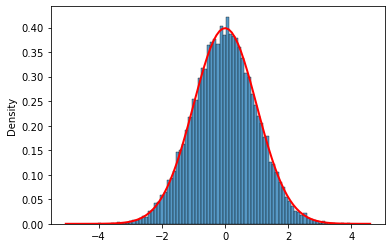

In [32]:
import seaborn as sb
import scipy
import matplotlib.pyplot as plt
ax=sb.histplot(G,stat='density')
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf') 
plt.show()

## El Mínimode distribibuciones uniformes independientes

### La distribución exponencial en scipy

In [35]:
from scipy.stats import expon
_lambda=1/5
dist=expon(scale=1/_lambda)
print (dist.mean())

5.0


In [36]:
from scipy.special import factorial
for k in range(1,6):
    print(k,"\t",dist.moment(k),"\t",factorial(k)/_lambda**k)

1 	 5.0 	 5.0
2 	 50.0 	 49.99999999999999
3 	 750.0 	 749.9999999999998
4 	 15000.0 	 14999.999999999996
5 	 375000.0000110965 	 374999.9999999999


In [37]:
print(dist.var())

25.0


In [38]:
a=dist.rvs(5)
print(a)

[11.21981719  1.14614599  7.44443411 14.20165773  9.5640703 ]


In [39]:
b=dist.rvs(5)
print(b)

[1.03829618 3.57154924 5.03917359 2.56562147 3.23280005]


In [41]:
m=np.minimum(a,b)
m

array([1.03829618, 1.14614599, 5.03917359, 2.56562147, 3.23280005])

In [42]:
v=np.dstack((a,b,m))
v

array([[[11.21981719,  1.03829618,  1.03829618],
        [ 1.14614599,  3.57154924,  1.14614599],
        [ 7.44443411,  5.03917359,  5.03917359],
        [14.20165773,  2.56562147,  2.56562147],
        [ 9.5640703 ,  3.23280005,  3.23280005]]])

In [43]:
v2=np.dstack((a,b))
v2

array([[[11.21981719,  1.03829618],
        [ 1.14614599,  3.57154924],
        [ 7.44443411,  5.03917359],
        [14.20165773,  2.56562147],
        [ 9.5640703 ,  3.23280005]]])

In [44]:
# 2 acá indica que queremos el máximo en el eje 2, es decir por columnas
np.min(v2,2)

array([[1.03829618, 1.14614599, 5.03917359, 2.56562147, 3.23280005]])

In [13]:
np.amin(v2,2)==m

array([[ True,  True,  True,  True,  True]])

In [45]:
v3=np.zeros((2,5))
v3

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [46]:
v3[0]=a
v3

array([[11.21981719,  1.14614599,  7.44443411, 14.20165773,  9.5640703 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [47]:
v3[1]=a
v3

array([[11.21981719,  1.14614599,  7.44443411, 14.20165773,  9.5640703 ],
       [11.21981719,  1.14614599,  7.44443411, 14.20165773,  9.5640703 ]])

### Simulando el mínimo de varias exponenciales

In [53]:
# Cuantas exponenciales cosiderar
N=10000
lambdas=[1,2,3,4]
v= np.zeros((N,len(lambdas)))
for i,_lambda in enumerate(lambdas):
    dist=expon(scale=1/_lambda)
    # lo guardamos en la fila i-ésima
    v[:,i]=dist.rvs(N)
v

array([[7.19677307e-01, 7.01255144e-01, 9.49399575e-02, 2.02374356e-02],
       [1.81594959e+00, 3.75653631e-01, 6.97314879e-01, 2.56689737e-01],
       [1.26275756e+00, 3.18786565e-03, 6.01564235e-01, 1.83969636e-01],
       ...,
       [7.50611145e-01, 3.31884987e-01, 2.57823394e-01, 2.39132193e-01],
       [3.25213753e-01, 2.05571172e-01, 2.81794577e-03, 4.42009769e-01],
       [4.52589273e+00, 1.71526614e-01, 1.73305683e-01, 4.47362820e-01]])

In [49]:
v.shape

(10, 4)

In [55]:
# Mínimo por filas
m=np.amin(v,1)
m

array([0.02023744, 0.25668974, 0.00318787, ..., 0.23913219, 0.00281795,
       0.17152661])

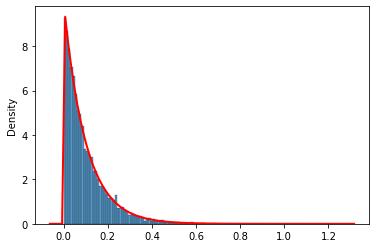

In [56]:
ax=sb.histplot(m,stat='density')
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
lambda_sum = np.sum(lambdas)
y_pdf = expon.pdf(x_pdf,scale=1/lambda_sum)
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf') 
plt.show()